# Figure manipulations
We can also provide different manipulations with figures using matrices. For example, we can rotate a figure using matrix multiplication

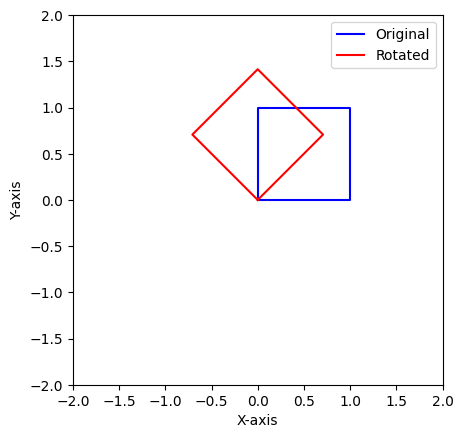

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the coordinates of the figure
x = np.array([0, 1, 1, 0, 0])
y = np.array([0, 0, 1, 1, 0])

# Plot the original figure
plt.plot(x, y, color='blue', label='Original')

# Define the rotation angle in degrees
angle_deg = 45

# Convert the angle to radians
angle_rad = np.radians(angle_deg)

# Create the rotation matrix
rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                            [np.sin(angle_rad), np.cos(angle_rad)]])

# Perform the rotation transformation
vertices = np.row_stack((x, y))
vertices_rotated = np.dot(rotation_matrix, vertices)

# Extract the rotated coordinates
x_rotated = vertices_rotated.T[:, 0]
y_rotated = vertices_rotated.T[:, 1]

# Plot the rotated figure
plt.plot(x_rotated, y_rotated, color='red', label='Rotated')

# Set the aspect ratio and limits of the plot
plt.gca().set_aspect('equal')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Display the plot
plt.show()

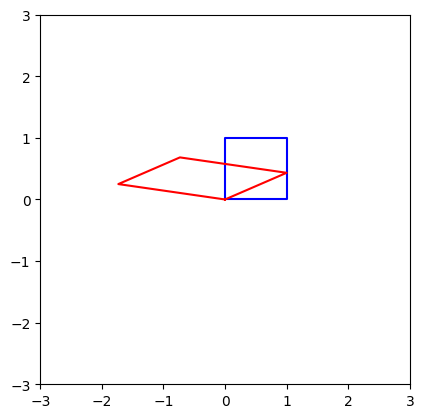

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to construct a rotation matrix
def rotation_matrix(angle):
    cos_theta = np.cos(angle)
    sin_theta = np.sin(angle)
    return np.array([[cos_theta, -sin_theta],
                     [sin_theta, cos_theta]])

# Function to construct a scaling matrix
def scaling_matrix(scale_x, scale_y):
    return np.array([[scale_x, 0],
                     [0, scale_y]])

# Function to plot a square
def plot_square(square, color):
    square = np.vstack((square, square[0]))  # Close the square by repeating the first point
    plt.plot(square[:, 0], square[:, 1], color=color)

# Define a square using its corners as a matrix
square = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]  # Close the square
]).T  # Transpose to have x and y as separate rows

# Plot the original square
plot_square(square.T, 'blue')

# Define the rotation angle and scaling factors
angle = np.pi / 3
scale_x, scale_y = 2, 0.5

# Construct the rotation and scaling matrices
rotation = rotation_matrix(angle)
scaling = scaling_matrix(scale_x, scale_y)

# Apply the transformations to the square
rotated_square = rotation @ square
transformed_square = scaling @ rotated_square

# Plot the transformed square
plot_square(transformed_square.T, 'red')

# Set the aspect ratio to equal and adjust the axis limits
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Display the plot
plt.show()

# How can we solve the optimization problem?

There is no one-size-fits-all approach to solving optimization problems, as the approach often depends on the type of function and the domain in which we seek the optimal solution. However, when dealing with a function of one variable, there is a specific algorithm that can effectively solve the optimization problem:

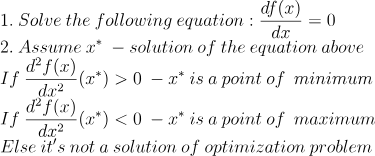

The solutions of the equation described in the first point is also called critical value of the function f.


Now let's look how to solve the optimization problem in Python:

In [3]:
import sympy as sp

# Step 1: Define the objective function
x = sp.Symbol('x')
f = x**3 - 6*x**2 + 9*x

# Step 2: Calculate the first derivative
f_prime = sp.diff(f, x)

# Step 3: Calculate the second derivative
f_double_prime = sp.diff(f_prime, x)

# Step 4: Find the critical points
critical_points = sp.solve(f_prime, x)

# Step 5: Check the second derivative at the critical points
optimal_points = []
# For loop to check all critical points
for point in critical_points:
    second_derivative_at_point = f_double_prime.subs({x:point})
# Checking second derivative to deternine type of the point
    if second_derivative_at_point > 0:
        optimal_points.append((point, 'minima'))
    elif second_derivative_at_point < 0:
        optimal_points.append((point, 'maxima'))

print(f'Objective function: f(x) = {f}')
print(f'First derivative: f\'(x) = {f_prime}')
print(f'Second derivative: f\'\'(x) = {f_double_prime}')
print(f'Critical points: {critical_points}')
print(f'Optimal points and type: {optimal_points}')


Objective function: f(x) = x**3 - 6*x**2 + 9*x
First derivative: f'(x) = 3*x**2 - 12*x + 9
Second derivative: f''(x) = 6*x - 12
Critical points: [1, 3]
Optimal points and type: [(1, 'maxima'), (3, 'minima')]


Завдання


Let's consider a physics-related optimization problem where we need to find the maximum height reached by an object thrown vertically upward with a given initial velocity.

We have the following equation:
h = v * t - 0.5 * g * t**2
that describes the motion of an object.

Our task is to find the time t when the object reaches its maximum height and then find the maximum height h_max.

Calculate the derivatives of the first and second order for the h function.
Find critical points of h function.

Check if these critical points are points of the maximum of the function h.

In [4]:
import sympy as sp

# Define the symbols
t = sp.symbols('t')

# Define the height function h(t)
v = 15.0  # Initial velocity in m/s
g = 9.81   # Acceleration due to gravity in m/s^2
h = v * t - (1/2) * g * t**2

# Calculate the first and second derivatives of h(t)
h_prime = sp.diff(h, t)
h_double_prime = sp.diff(h_prime, t)

# Find the critical points by solving h'(t) = 0
critical_points = sp.solve(h_prime, t)

# Identify the maximum height by evaluating h''(t) at each critical point
maximum_height = -1
for t_critical in critical_points:
    h_double_prime_value = h_double_prime.subs({t:t_critical})
    if h_double_prime_value < 0:
        maximum_height = h.subs({t:t_critical})

# Print the result
if maximum_height != -1:
    print(f'The object reaches its maximum height of {maximum_height:.2f} meters at time t = {t_critical:.2f} seconds.')
else:
    print('There is no maximum height (object doesn\'t reach the ground).')

The object reaches its maximum height of 11.47 meters at time t = 1.53 seconds.


# What is gradient descent?

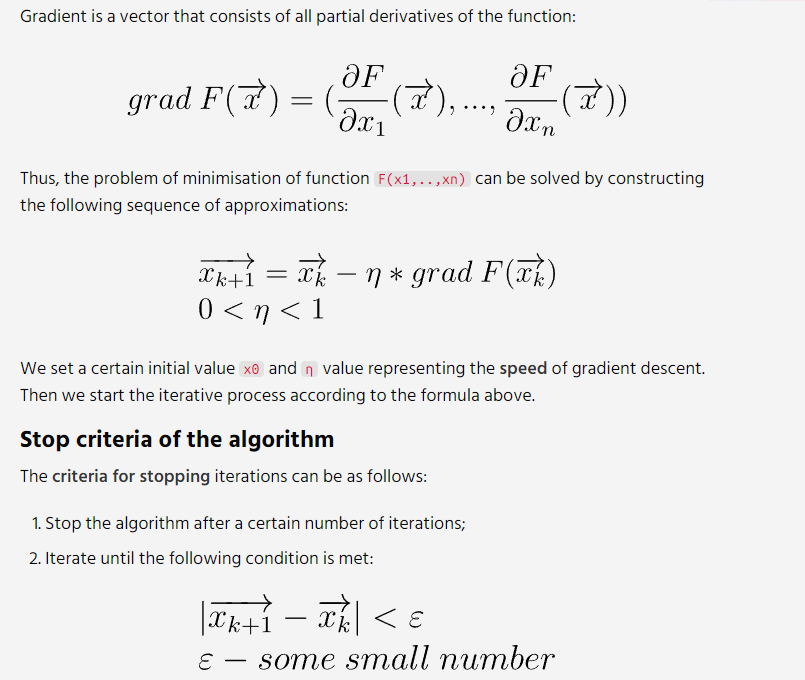

We have to pay attention to two important features of the gradient descent method:

This method can only find the point of minimum of the function F(x). If you want to find a point of maximum, you can consider function -F(x) and use gradient descent for it;

If we compare the algorithm we discussed earlier with gradient descent, we can see that gradient descent performs a similar task to the first stage of the algorithm - finding a critical value, which might be a potential minimum point. As a result, it is possible that the point found by gradient descent may either be a local minimum within some subset of the domain or not a minimum point at all.

Example
Let's find out how to solve the optimization problem in Python:

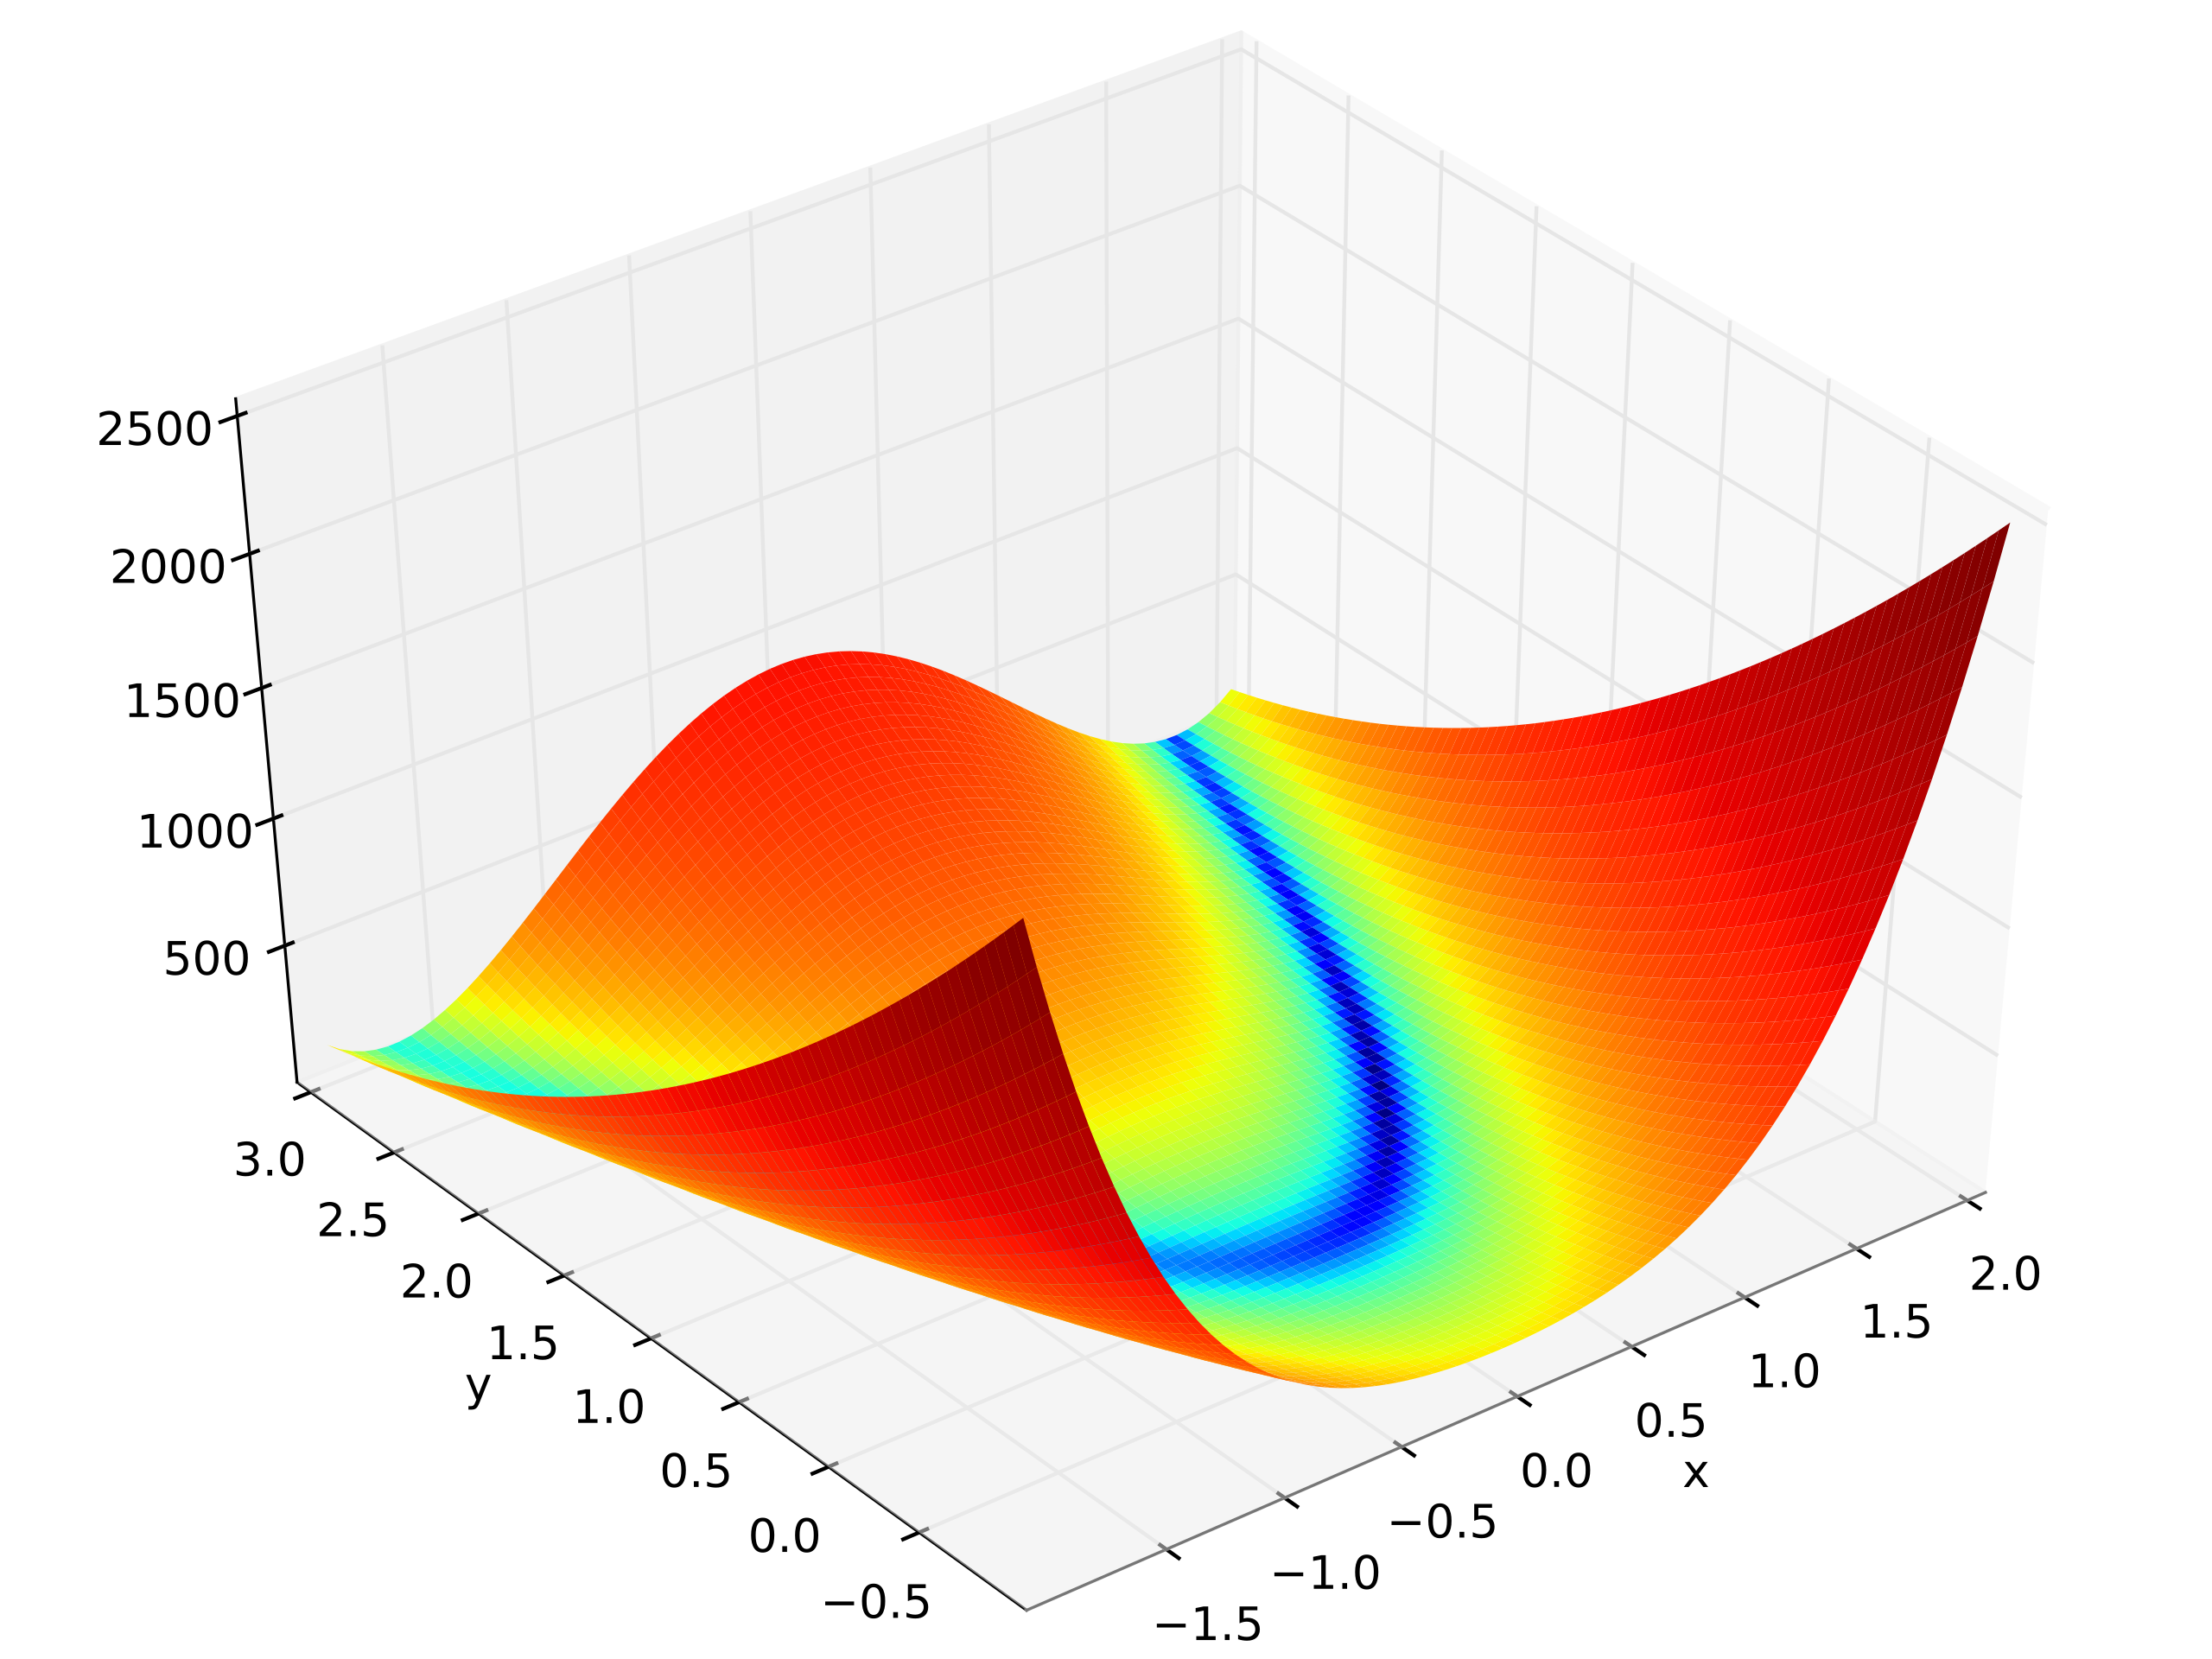

In [1]:
import numpy as np
from scipy.optimize import minimize

# Define the Rosenbrock function
def rosenbrock(x):
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

# Initial guess for x and y
x0 = np.array([2, 2])

# Use scipy.optimize.minimize to find the minimum of the Rosenbrock function
result = minimize(rosenbrock, x0)

# Extract the optimal x and the minimum value of the Rosenbrock function
optimal_x = result.x
min_value = result.fun

print(f'Optimal x: {optimal_x}')
print(f'Minimum value of the Rosenbrock function: {min_value:.4f}')

Optimal x: [0.99999565 0.99999129]
Minimum value of the Rosenbrock function: 0.0000


In this example, we define the Rosenbrock function, set an initial guess for x, and then use scipy.optimize.minimize to find the minimum of the Rosenbrock function. The result.x attribute contains the optimal x, and result.fun contains the minimum value of the Rosenbrock function.

Note

The Rosenbrock function is often used as a benchmark for testing and comparing optimization algorithms due to its non-convex nature and the presence of a narrow, curved minimum valley.